## Business Understanding

### 1. Problem Statements (Pernyataan Masalah)
Dalam dunia pendidikan, banyak faktor yang berkontribusi terhadap pencapaian akademik siswa. Namun, tidak semua faktor ini terlihat jelas, dan sulit bagi pendidik untuk mengetahui dengan pasti faktor mana yang paling berpengaruh terhadap nilai siswa. Masalah ini muncul dalam pertanyaa, seperti:
- Apa saja faktor yang dapat mempengaruhi nilai akademis siswa?
- Apakah kegiatan siswa di luar sekolah, seperti ekstrakulikuler, olahraga, musik dan menjadi volunteer memiliki dampak positif terhadap prestasi akademis siswa?
- Apakah dukungan dari orang tua berpengaruh terhadap nilai akademis siswa?
- Bagaimana peran bimbingan belajar dalam mempengaruhi nilai akademis siswa?
- Bisakah kita membuat model prediksi yang akurat untuk memprediksi GPA siswa berdasarkan data pendukung yang ada?

#### 2. Goals (Tujuan)
Tujuan utama dari proyek analisis prediktif ini adalah untuk menjawab pertanyaan-pertanyaan di atas, beberapa tujuan spesifik yang ingin dicapai adalah sebagai berikut:
- Mengidentifikasi faktor-faktor yang dapat mempengaruhi nilai akademis siswa
- Menmeriksa faktor seperti kegiatan siswa di luar sekolah, seperti ekstrakulikuler, olahraga, musik dan menjadi volunteer memiliki dampak positif terhadap prestasi akademis siswa
- Mengetahui pengaruh dukungan dari orang tua terhadap nilai akademis siswa
- Melihat peran bimbingan belajar terhadap nilai akademis siswa
- Membuat model prediksi yang akurat untuk memprediksi GPA siswa berdasarkan data pendukung yang ada

## Data Understanding

Dataset berisi 2.392 baris dan 15 kolom, dataset terdiri dari Id siswa, demografi siswa (usia, gender, etnis, pendidikan terakhir oranb tua), jam belajar mingguan, jumlah absen dalam setahun, status memakai tutor, dukungan orang tua, kegiatan ekstrakurikuler, kegiatan musik, kegiatan olahraga, kegiatan relawan, nilai, dan kelas. Target dari prediksi ini yaitu gpa predictive, atau prediksi nilai yang akan diraih. Kondisi data sudah bersih dari outliers dan missing values.

Referensi:
Rabie El Kharoua. "📚 Students Performance Dataset 📚". Tautan: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset. Diakses pada 12 Oktober 2024

## Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# load the dataset
url = '/content/Student_performance_data _.csv'
gpa = pd.read_csv(url)
gpa

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


- Ada 2.392 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 15 kolom yaitu: StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass

## Exploratory Data Analysis - Deskripsi Variabel

Deskripsi variabel dataset:
- StudentID : id tiap siswa dengan rentang 1001 - 3392
- Age : usia siswa dengan rentang 15 - 18 tahun
- Gender : jenis kelamin siswa (0: laki-laki, 1: perempuan)
- Ethnicity : etnis siswa (0: Kaukasia, 1: Afrika-Amerika, 2: Asia 3: Lainnya)
- ParentalEducation : tingkat pendidikan terakhir orang tua (0: tidak ada, 1: SMA, 2: beberapa perguruan tinggi, 3: sarjana, 4: lebih tinggi)
- StudyTimeWeekly : waktu belajar mingguan dalam satuan jam dengan rentang dari 0 - 20 jam
- Absences : jumlah ketidakhadiran atau absen selama tahun ajaran dengan rentang dari 0 - 30.
- Tutoring : status bimbingan belajar (0: tidak dan 1: ya)
- ParentalSupport : tingkat dukungan orang tua (0: tidak ada, 1: rendah, 2: sedang, 3: tinggi, 4: sangat tinggi)
Extracurricular : partisipasi dalam kegiatan ekstrakulikuler (0: tidak, 1: ya)
- Sports : partisipasi dalam kegiatan olahraga (0: tidak, 1: ya)
- Music : partisipasi dalam kegiatan musik (0: tidak, 1: ya)
- Volunteering : partisipasi dalam kegiatan sukarelawan (0: tidak, 1: ya)
- GPA : nilai ipk dengan rentang 0.0 - 4.0
- GradeClass : klasifikasi nilai siswa dari GPA (0: 'A' (IPK >= 3,5), 1: 'B' (3.0 <= IPK < 3.5), 2: 'C' (2.5 <= IPK < 3.0), 3: 'D' (2.0 <= IPK < 2.5), 4: 'F' (IPK < 2.0))

In [ ]:
gpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Dari output terlihat bahwa:

- Terdapat 11 kolom dengan tipe int64, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (faktor non-numerik).
- Terdapat 3 kolom numerik dengan tipe data float64 yaitu: StudyTimeWeekly, GPA, GradeClass
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target faktor kita.

In [ ]:
gpa.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Memeriksa Missing Value

In [ ]:
gpa.duplicated().sum()

0

Dari hasil pemeriksaan missing value, dapat dilihat data sudah bersih dari missing value

## Memeriksa Outliers

<Axes: xlabel='StudyTimeWeekly'>

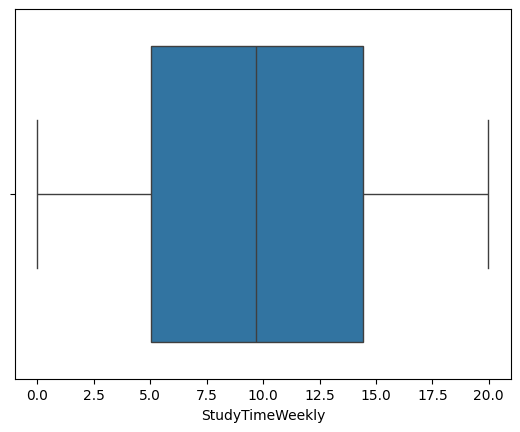

In [ ]:
sns.boxplot(x=gpa['StudyTimeWeekly'])

<Axes: xlabel='Absences'>

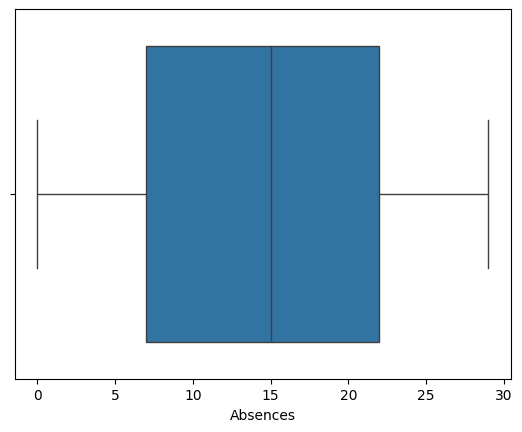

In [ ]:
sns.boxplot(x=gpa['Absences'])

Dapat dilihat, data juga sudah bersih dari outliers

In [ ]:
gpa.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


## Univariate Analysis

In [ ]:
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular',
                        'Sports', 'Music', 'Volunteering', 'GradeClass']

##### Categorical Features

        jumlah sampel  persentase
Gender                           
1                1222        51.1
0                1170        48.9


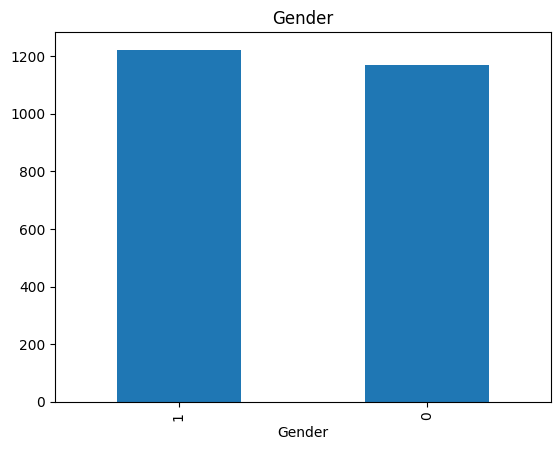

In [ ]:
count = gpa['Gender'].value_counts()
percent = 100*gpa['Gender'].value_counts(normalize=True)
gpa_gender = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_gender)
count.plot(kind='bar', title='Gender');

Terdapat 2 kategori pada Gender, secara berurutan dari jumlahnya yang paling banyak yaitu: Laki-Laki. Dari data persentase dapat kita simpulkan bahwa 51.1% data adalah laki-laki.

           jumlah sampel  persentase
Ethnicity                           
0                   1207        50.5
1                    493        20.6
2                    470        19.6
3                    222         9.3


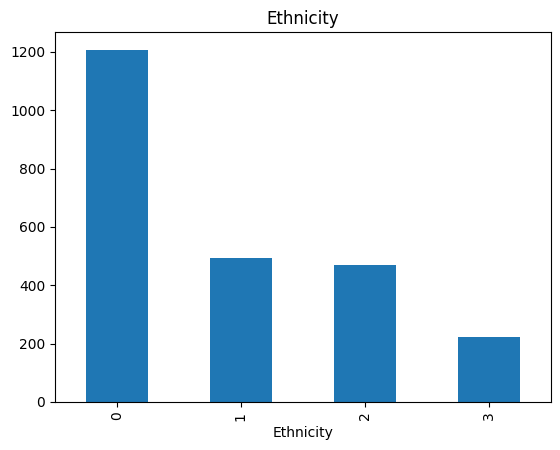

In [ ]:
count = gpa['Ethnicity'].value_counts()
percent = 100*gpa['Ethnicity'].value_counts(normalize=True)
gpa_ethnic = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_ethnic)
count.plot(kind='bar', title='Ethnicity');

Terdapat 4 kategori pada Gender, secara berurutan dari jumlahnya yang paling banyak yaitu: Kaukasian, dan yang paling sedikit adalah lainnya


                   jumlah sampel  persentase
ParentalEducation                           
2                            934        39.0
1                            728        30.4
3                            367        15.3
0                            243        10.2
4                            120         5.0


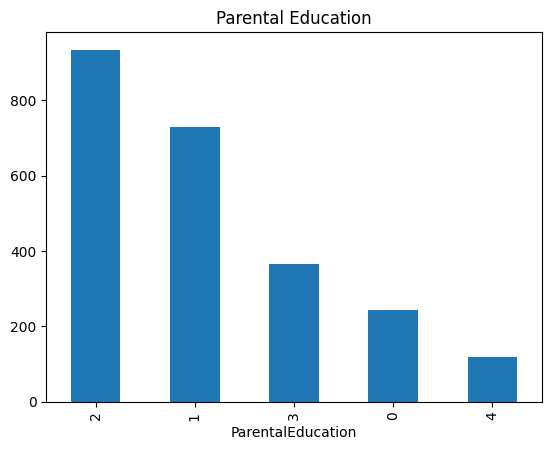

In [ ]:
count = gpa['ParentalEducation'].value_counts()
percent = 100*gpa['ParentalEducation'].value_counts(normalize=True)
gpa_predu = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_predu)
count.plot(kind='bar', title='Parental Education');

Terdapat 5 kategori pada ParentalEducation, secara berurutan dari jumlahnya yang paling banyak yaitu: lulusan beberapa perguruan tinggi, lalu disusul oleh lulusan SMA

          jumlah sampel  persentase
Tutoring                           
0                  1671        69.9
1                   721        30.1


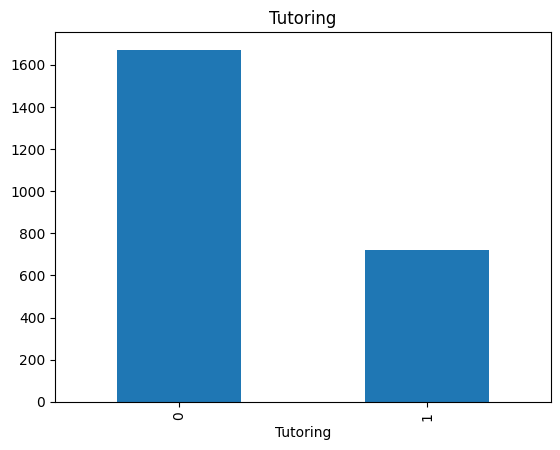

In [ ]:
count = gpa['Tutoring'].value_counts()
percent = 100*gpa['Tutoring'].value_counts(normalize=True)
gpa_tutor = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_tutor)
count.plot(kind='bar', title='Tutoring');

Terdapat 2 kategori pada Tutoring, secara berurutan dari jumlahnya yang paling banyak yaitu: 0, atau lebih banyak siswa yang tidak mengambil bimbingan belajar

                 jumlah sampel  persentase
ParentalSupport                           
2                          740        30.9
3                          697        29.1
1                          489        20.4
4                          254        10.6
0                          212         8.9


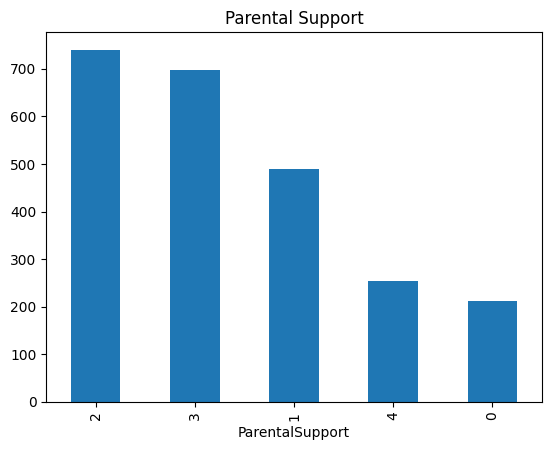

In [ ]:
count = gpa['ParentalSupport'].value_counts()
percent = 100*gpa['ParentalSupport'].value_counts(normalize=True)
gpa_prsupport = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_prsupport)
count.plot(kind='bar', title='Parental Support');

Terdapat 5 kategori pada ParentalSupport, secara berurutan dari jumlahnya yang paling banyak yaitu: 2 atau dukungan sedang, lalu disusul 3 atau dukungan tinggi, dan di urutan terakhir 0 atau dukungan rendah.

                 jumlah sampel  persentase
Extracurricular                           
0                         1475        61.7
1                          917        38.3


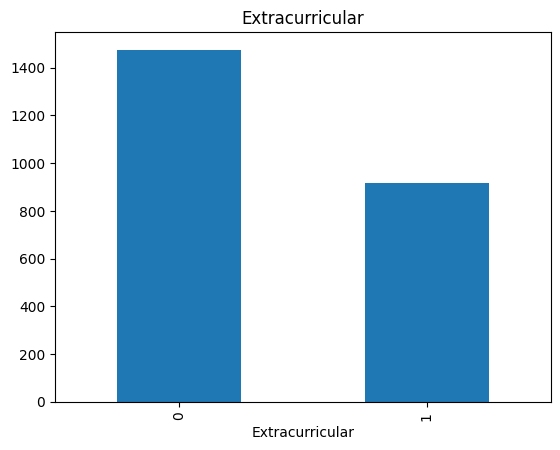

In [ ]:
count = gpa['Extracurricular'].value_counts()
percent = 100*gpa['Extracurricular'].value_counts(normalize=True)
gpa_extra = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_extra)
count.plot(kind='bar', title='Extracurricular');

Terdapat 2 kategori pada Ekstrakulikuler, secara berurutan dari jumlahnya yang paling banyak yaitu: 0, atau lebih banyak siswa tidak menngikuti kegiatan esktrakulikuler

        jumlah sampel  persentase
Sports                           
0                1666        69.6
1                 726        30.4


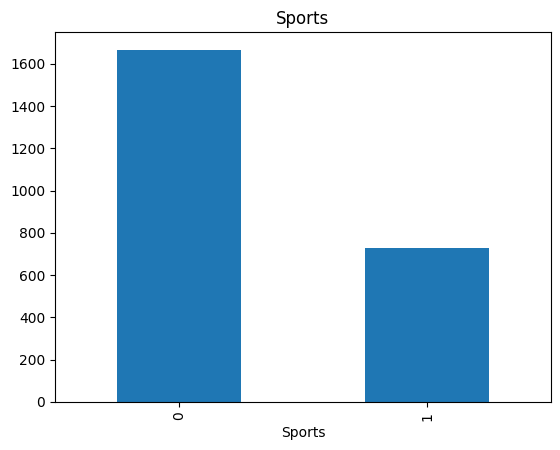

In [ ]:
count = gpa['Sports'].value_counts()
percent = 100*gpa['Sports'].value_counts(normalize=True)
gpa_sports = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_sports)
count.plot(kind='bar', title='Sports');

Terdapat 2 kategori pada Sports, secara berurutan dari jumlahnya yang paling banyak yaitu: 0, atau lebih banyak siswa yang tidak mengikuti olahraga

       jumlah sampel  persentase
Music                           
0               1921        80.3
1                471        19.7


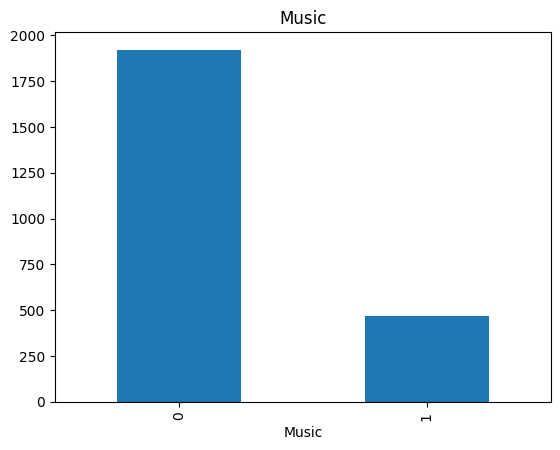

In [ ]:
count = gpa['Music'].value_counts()
percent = 100*gpa['Music'].value_counts(normalize=True)
gpa_music = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_music)
count.plot(kind='bar', title='Music');

Terdapat 2 kategori pada Music, secara berurutan dari jumlahnya yang paling banyak yaitu: 0, atau lebih banyak siswa yang tidak mengikuti musik

              jumlah sampel  persentase
Volunteering                           
0                      2016        84.3
1                       376        15.7


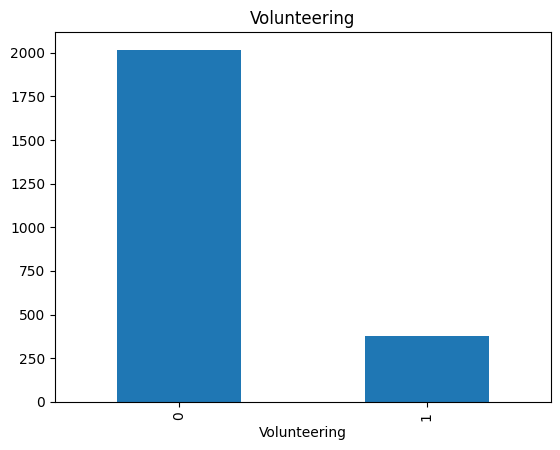

In [ ]:
count = gpa['Volunteering'].value_counts()
percent = 100*gpa['Volunteering'].value_counts(normalize=True)
gpa_volun = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_volun)
count.plot(kind='bar', title='Volunteering');

Terdapat 2 kategori pada Volunteering, secara berurutan dari jumlahnya yang paling banyak yaitu: 0, atau lebih banyak yang tidak mengikuti kegiatan volunteering

            jumlah sampel  persentase
GradeClass                           
4.0                  1211        50.6
3.0                   414        17.3
2.0                   391        16.3
1.0                   269        11.2
0.0                   107         4.5


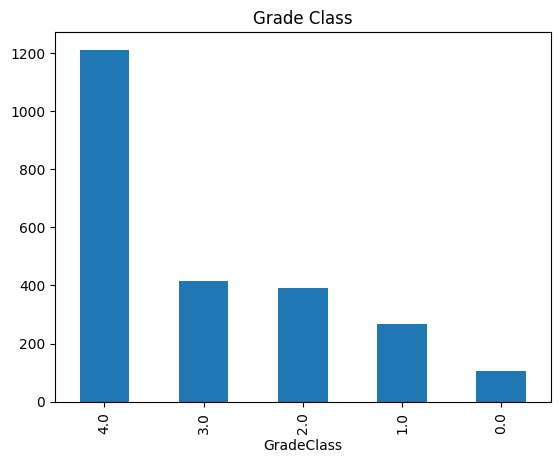

In [ ]:
count = gpa['GradeClass'].value_counts()
percent = 100*gpa['GradeClass'].value_counts(normalize=True)
gpa_grclass = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(gpa_grclass)
count.plot(kind='bar', title='Grade Class');

Terdapat 5 kategori pada Gender, secara berurutan dari jumlahnya yang paling banyak yaitu: 4, atau lebih banyak siswa yang memiliki GPA F atau di bawah 2.0

#### Numerical Features

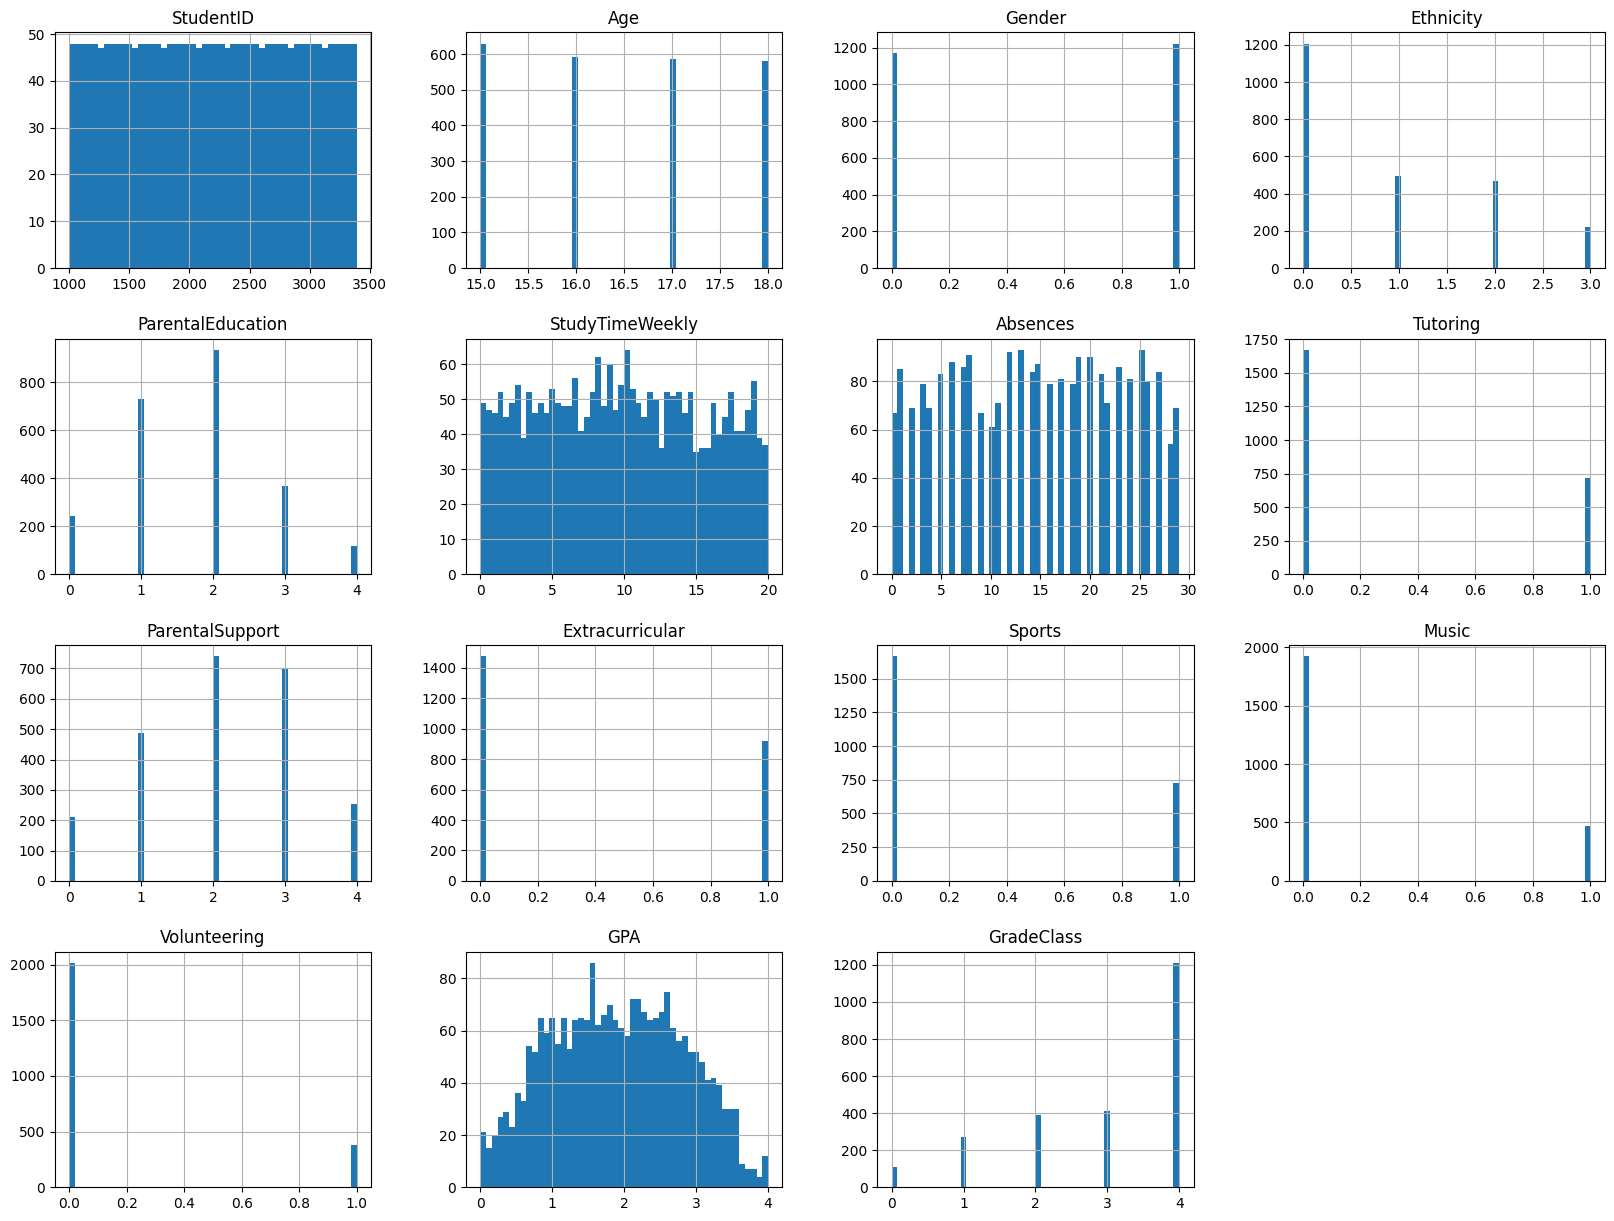

In [ ]:
gpa.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "GPA", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds tertinggi berada di sekitar 1.5, hal ini cukup disayangkan karena masih tergolong F atau cukup rendah
- Masih cukup sedikit siswa yang memiliki GPA di sekitar 3 sampai 4


## Exploratory Data Analysis - Multivariate Analysis

#### Categorical Features

In [ ]:
gpa

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
gpa_cat = gpa[['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular',
               'Sports', 'Music', 'Volunteering', 'GradeClass']]
gpa_cat

,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1,0,2,1,2,0,0,1,0,2.0
1,0,0,1,0,1,0,0,0,0,1.0
2,0,2,3,0,2,0,0,0,0,4.0
3,1,0,3,0,3,1,0,0,0,3.0
4,1,0,2,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...
2387,1,0,3,0,4,1,0,0,0,0.0
2388,0,0,1,1,4,0,1,0,0,4.0
2389,1,0,2,0,2,0,0,0,1,2.0
2390,1,1,0,0,2,0,1,1,0,1.0


<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


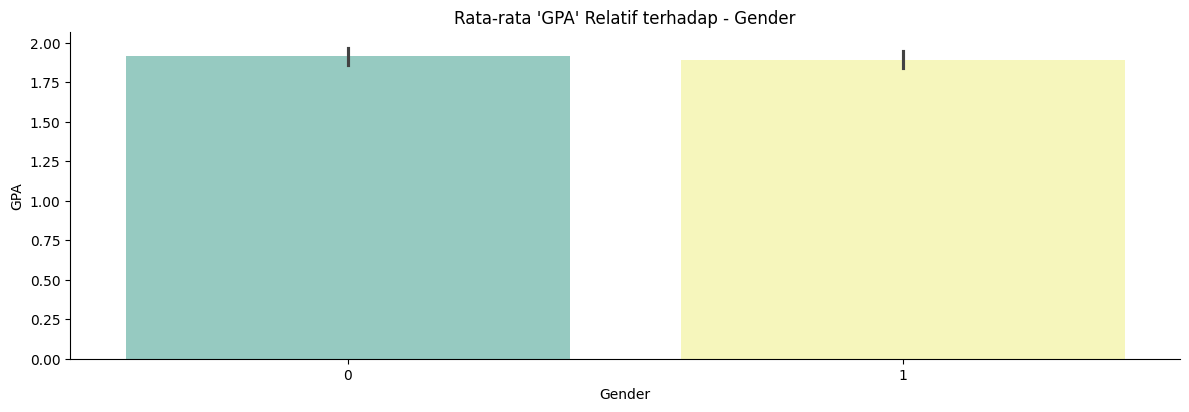

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


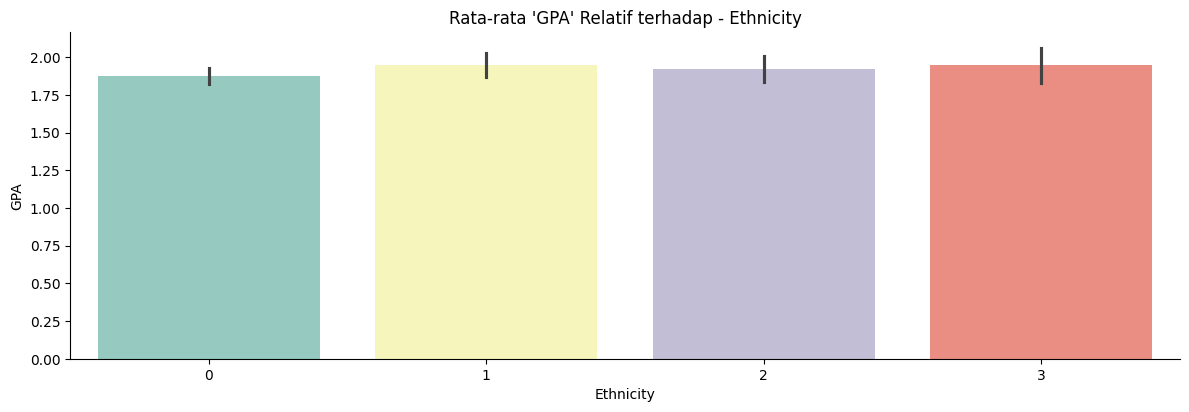

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


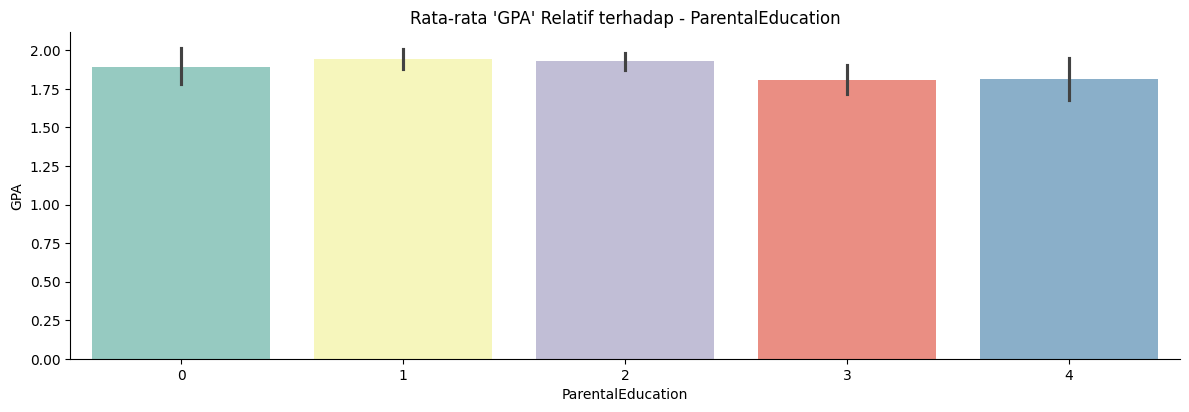

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


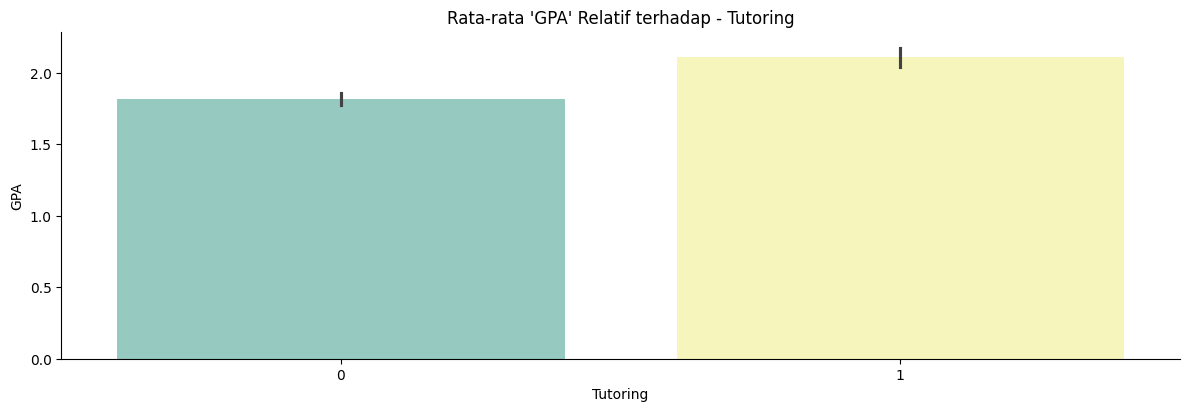

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


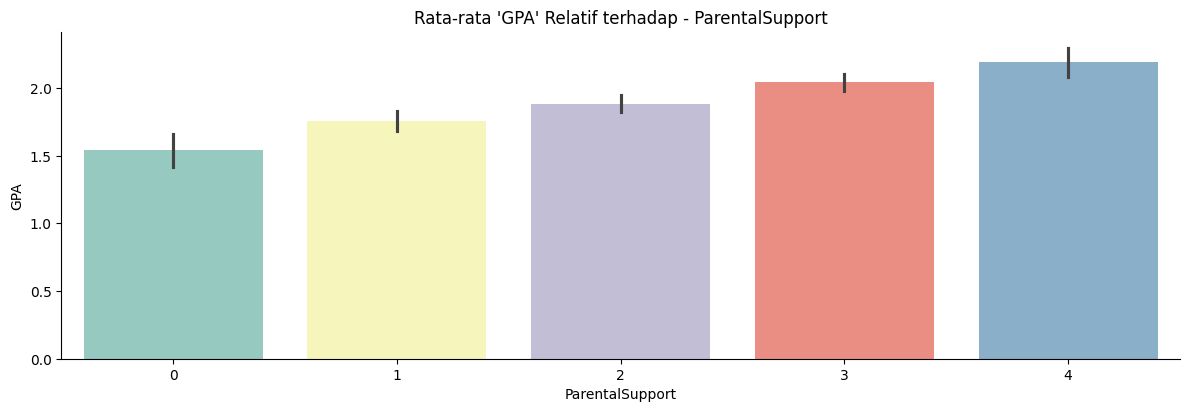

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


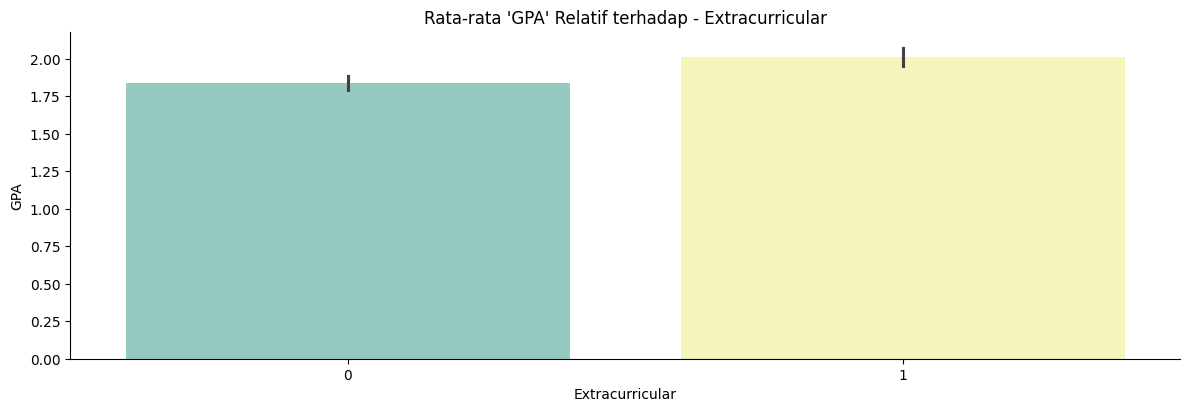

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


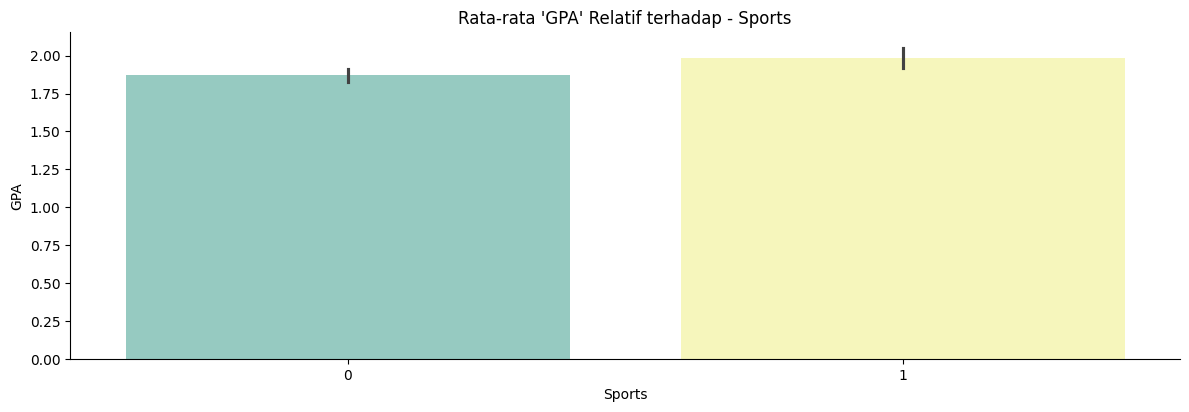

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


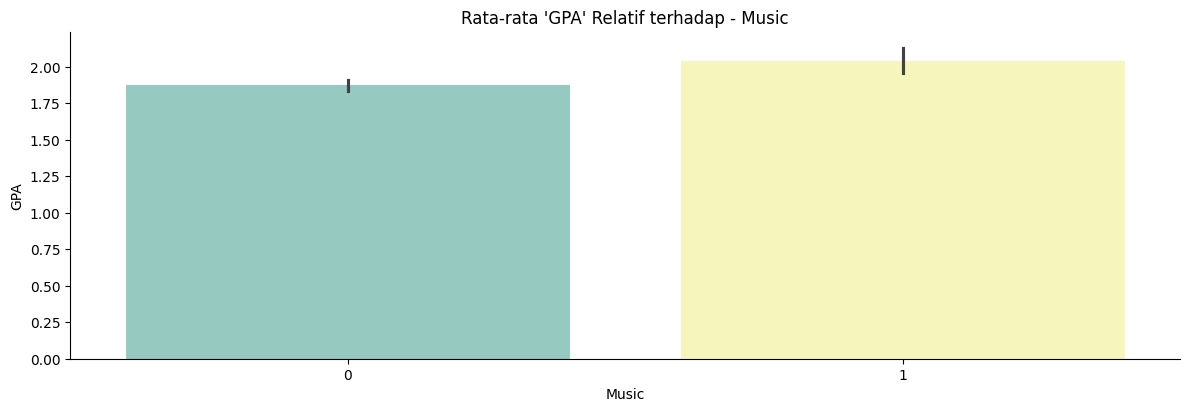

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


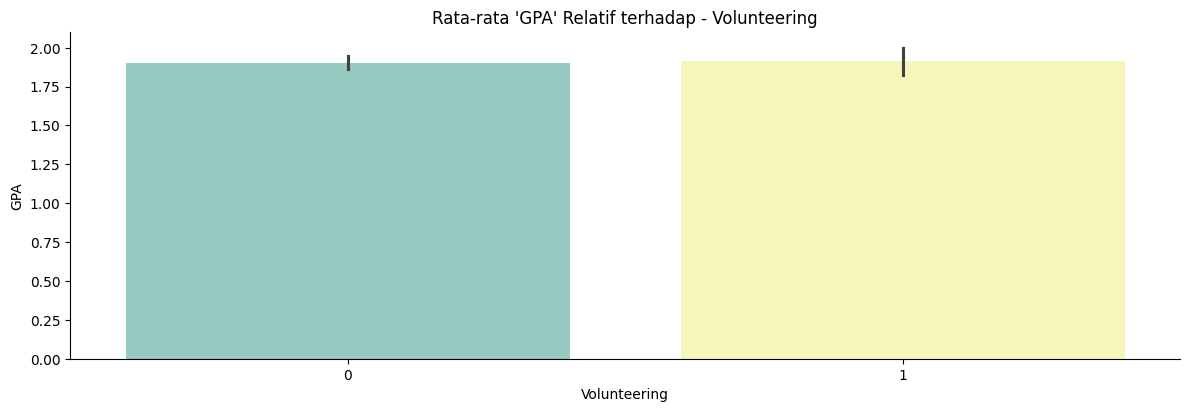

<ipython-input-116-83d30da4f9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")


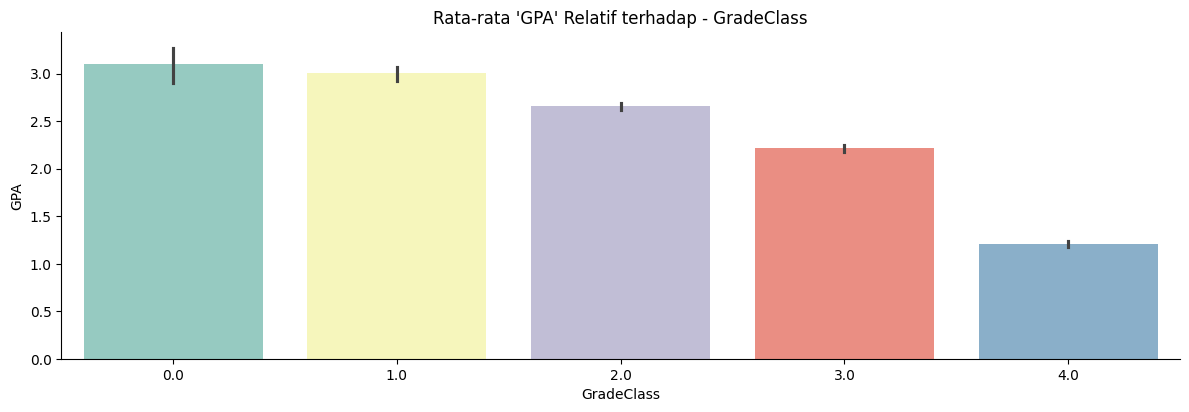

In [ ]:
#mengecek rata-rata harga terhadap tiap-tiap faktor, untuk mengetahui seberapa berpengaruhnya

for col in gpa_cat:
  sns.catplot(x=col, y="GPA", kind="bar", dodge=False, height = 4, aspect = 3,  data=gpa, palette="Set3")
  plt.title("Rata-rata 'GPA' Relatif terhadap - {}".format(col))
  plt.show()

Dengan mengamati rata-rata GPA relatif terhadap faktor kategori di atas, kita memperoleh insight sebagai berikut:

- Pada faktor Gender, rata-ratanya hampir sama. Sehingga, faktor ini tidak memiliki pengaruh signifikan terhadap GPA
- Pada faktor EThnicity, rata-rata yang dihasilkan juga hampir tidak jauh berbeda pada keempat jenis etnis. Sehingga, faktor ini juga tidak memiliki pengaruh signifikan terhadap GPA
- Pada faktor ParentalEducation, rata-rata yang dihasilkan juga hampir tidak jauh berbeda pada keempat jenis etnis. Sehingga, faktor ini juga tidak memiliki pengaruh signifikan terhadap GPA
- Pada faktor Tutoring, rata-rata yang dihasilkan oleh 1 (atau memakai bimbel) lebih tinggi. Sehingga, faktor ini memiliki pengaruh signifikan terhadap GPA
- Pada faktor ParentalSupport, rata-rata yang dihasilkan berbanding lurus dengan kenaikan GPA. Semakin tinggi nilainya, GPA juga meningkat. Sehingga, faktor ini memiliki pengaruh signifikan terhadap GPA
- Pada faktor Extraculiculler, Sports dan Music, rata-rata yang dihasilkan oleh 1 (atau status = ya) lebih tinggi. Sehingga, ketiga faktor ini memiliki pengaruh signifikan terhadap GPA
- Pada faktor Volunteering, rata-rata yang dihasilkan jhampir sama. Sehingga, faktor ini juga tidak memiliki pengaruh signifikan terhadap GPA
- Pada faktor GradeClass, rata-rata yang dihasilkan tidak begitu pengaruh, karena memang pada dasarnya Grade Class adalah bentuk lain dari GPA.


Kesimpulan: Tutoring, ParentalSupport, Extraculiculler, Sports dan Music adalah faktor faktor yang berpengaruh terhadap GPA

In [ ]:
#Faktor yang tidak berpengaruh didrop
gpa.drop(['Gender'], inplace=True, axis=1)
gpa.drop(['Ethnicity'], inplace=True, axis=1)
gpa.drop(['ParentalEducation'], inplace=True, axis=1)
gpa.drop(['Volunteering'], inplace=True, axis=1)
gpa.drop(['GradeClass'], inplace=True, axis=1)
gpa

,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,1001,17,19.833723,7,1,2,0,0,1,2.929196
1,1002,18,15.408756,0,0,1,0,0,0,3.042915
2,1003,15,4.210570,26,0,2,0,0,0,0.112602
3,1004,17,10.028829,14,0,3,1,0,0,2.054218
4,1005,17,4.672495,17,1,3,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,10.680555,2,0,4,1,0,0,3.455509
2388,3389,17,7.583217,4,1,4,0,1,0,3.279150
2389,3390,16,6.805500,20,0,2,0,0,0,1.142333
2390,3391,16,12.416653,17,0,2,0,1,1,1.803297


#### Numerical Features

In [ ]:
gpa_num = gpa[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
gpa_num

,Age,StudyTimeWeekly,Absences,GPA
0,17,19.833723,7,2.929196
1,18,15.408756,0,3.042915
2,15,4.210570,26,0.112602
3,17,10.028829,14,2.054218
4,17,4.672495,17,1.288061
...,...,...,...,...
2387,18,10.680555,2,3.455509
2388,17,7.583217,4,3.279150
2389,16,6.805500,20,1.142333
2390,16,12.416653,17,1.803297


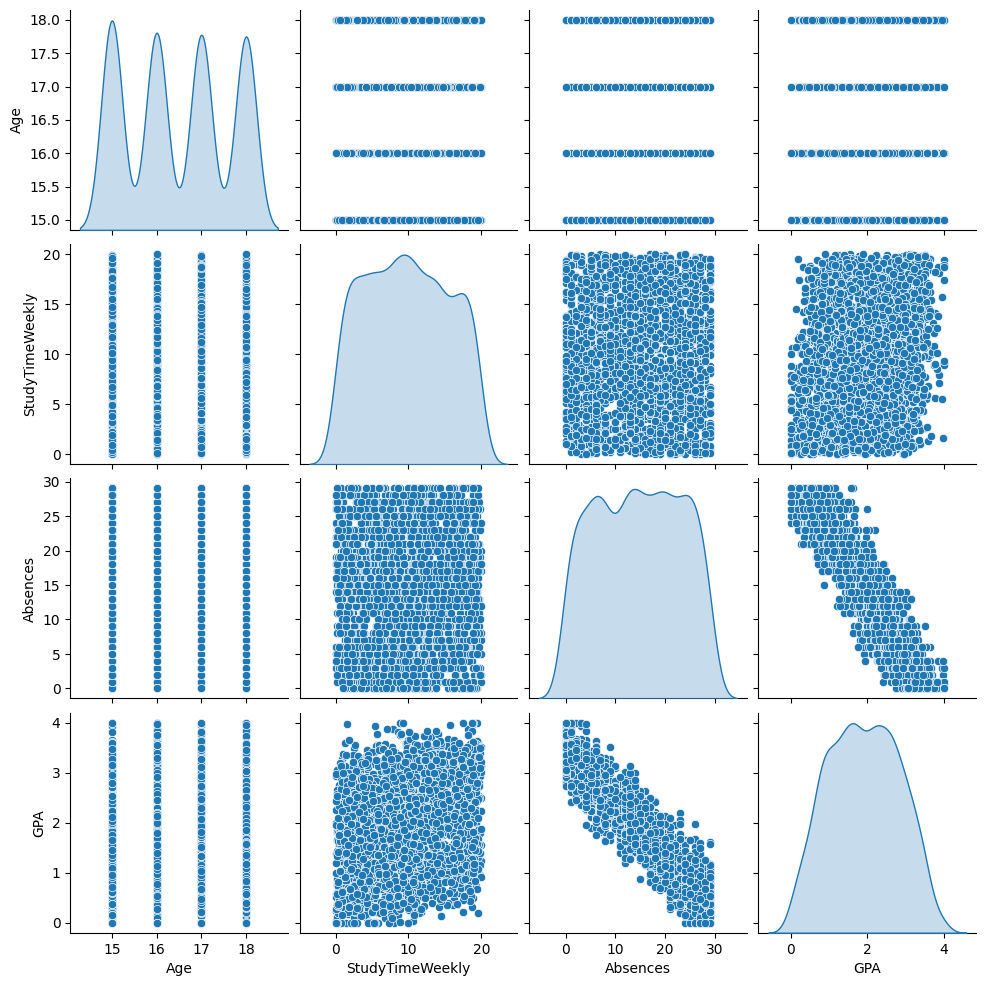

In [ ]:
# Mengamati hubungan antar faktor numerik dengan fungsi pairplot(), untuk mengetahui korelasi antara harga dan tiap faktor
sns.pairplot(gpa_num, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot sebelumnya, terlihat Absences dan StudyTimeWeekly memiliki korelasi yang tinggi dengan faktor GPA. Sedangkan kedua faktor Age terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola,

Text(0.5, 1.0, 'Correlation Matrix untuk faktor Numerik ')

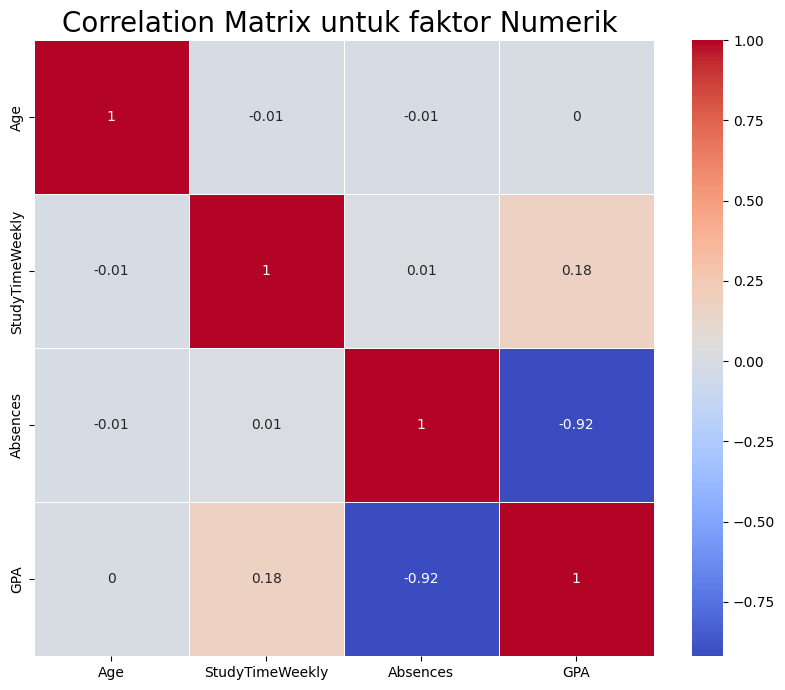

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = gpa_num.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk faktor Numerik ", size=20)


Faktor Absences (-0.92) dan StudyTimeWeekly (0.18) memiliki skor korelasi yang besar dengan faktor target GPA. Artinya, faktor GPA berkorelasi tinggi dengan  faktor tersebut. Sementara itu, faktor Age memiliki korelasi yang sangat kecil (0). Sebenarnya, jika dilihat dari heatmap, faktor Absence memiliki korelasi yang rendah, tetapi karena faktor ini membentuk pola pada scatterplot sebelumnya, maka faktor ini dipertahankan

In [ ]:
#Karena Age memiliki korelasi rendah, maka ia di drop
gpa.drop(['Age'], inplace=True, axis=1)
gpa

,StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,1001,19.833723,7,1,2,0,0,1,2.929196
1,1002,15.408756,0,0,1,0,0,0,3.042915
2,1003,4.210570,26,0,2,0,0,0,0.112602
3,1004,10.028829,14,0,3,1,0,0,2.054218
4,1005,4.672495,17,1,3,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...
2387,3388,10.680555,2,0,4,1,0,0,3.455509
2388,3389,7.583217,4,1,4,0,1,0,3.279150
2389,3390,6.805500,20,0,2,0,0,0,1.142333
2390,3391,12.416653,17,0,2,0,1,1,1.803297


## Data Preparation

#### Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah faktor dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi faktor, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

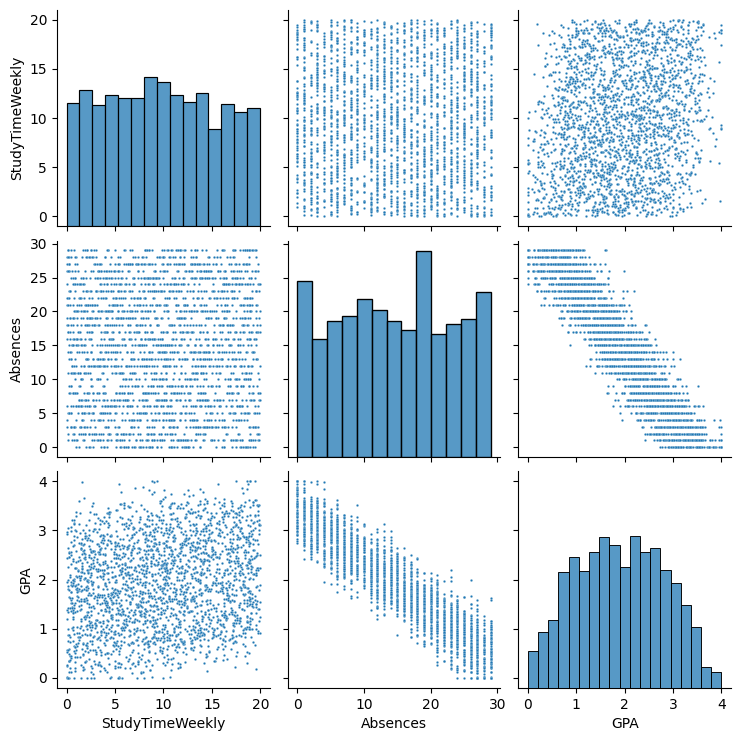

In [ ]:
sns.pairplot(gpa[['StudyTimeWeekly','Absences', 'GPA']], plot_kws={'s':3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(gpa[['StudyTimeWeekly','Absences', 'GPA']])
princ_comp = pca.transform(gpa[['StudyTimeWeekly','Absences', 'GPA']])

In [ ]:
#mengetahui proporsi informasi dari ketiga komponen
pca.explained_variance_ratio_.round(3)

array([0.693, 0.306, 0.001])

In [ ]:
#membuat faktor baru bernama 'dimension' untuk menggantikan faktor faktor 'StudyTimeWeekly','Absences', 'GPA'
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(gpa[['StudyTimeWeekly','Absences', 'GPA']])
gpa['dimension'] = pca.transform(gpa.loc[:, ('StudyTimeWeekly','Absences', 'GPA')]).flatten()

In [ ]:
gpa

,StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA,dimension
0,1001,19.833723,7,1,2,0,0,1,2.929196,-7.517664
1,1002,15.408756,0,0,1,0,0,0,3.042915,-14.532855
2,1003,4.210570,26,0,2,0,0,0,0.112602,11.530956
3,1004,10.028829,14,0,3,1,0,0,2.054218,-0.551119
4,1005,4.672495,17,1,3,0,0,0,1.288061,2.463186
...,...,...,...,...,...,...,...,...,...,...
2387,3388,10.680555,2,0,4,1,0,0,3.455509,-12.624746
2388,3389,7.583217,4,1,4,0,1,0,3.279150,-10.644167
2389,3390,6.805500,20,0,2,0,0,0,1.142333,5.481353
2390,3391,12.416653,17,0,2,0,1,1,1.803297,2.479674


## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X = gpa.drop(["GPA"],axis =1)
y = gpa["GPA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2392
Total # of sample in train dataset: 1913
Total # of sample in test dataset: 479


Membagi dataset menjadi 80% data train dan 20% data uji

## Standarisasi

StandardScaler melakukan proses standarisasi faktor dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [ ]:
print(X_train.columns)

Index(['StudentID', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'dimension'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Tutoring',	'ParentalSupport',	'Extracurricular',	'Sports',	'Music']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features]

,Tutoring,ParentalSupport,Extracurricular,Sports,Music
1725,1.550456,-0.113806,1.297316,-0.643347,-0.497875
1716,-0.644971,1.670714,-0.770822,-0.643347,2.008534
383,-0.644971,0.778454,-0.770822,-0.643347,-0.497875
828,1.550456,-1.898327,-0.770822,-0.643347,-0.497875
2223,-0.644971,-1.006067,-0.770822,-0.643347,-0.497875
...,...,...,...,...,...
1147,-0.644971,0.778454,-0.770822,-0.643347,-0.497875
2154,-0.644971,0.778454,1.297316,-0.643347,-0.497875
1766,-0.644971,-1.006067,1.297316,-0.643347,-0.497875
1122,-0.644971,0.778454,1.297316,-0.643347,-0.497875


In [ ]:
#mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

X_train[numerical_features].describe().round(4)

,Tutoring,ParentalSupport,Extracurricular,Sports,Music
count,1913.0000,1913.0000,1913.0000,1913.0000,1913.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003
min,-0.6450,-1.8983,-0.7708,-0.6433,-0.4979
25%,-0.6450,-1.0061,-0.7708,-0.6433,-0.4979
50%,-0.6450,-0.1138,-0.7708,-0.6433,-0.4979
75%,1.5505,0.7785,1.2973,1.5544,-0.4979
max,1.5505,1.6707,1.2973,1.5544,2.0085


In [ ]:
X_train

,StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,dimension
1725,2726,18.251684,18,1.550456,-0.113806,1.297316,-0.643347,-0.497875,3.517320
1716,2717,19.609416,18,-0.644971,1.670714,-0.770822,-0.643347,2.008534,3.530376
383,1384,16.212077,20,-0.644971,0.778454,-0.770822,-0.643347,-0.497875,5.518057
828,1829,11.369444,8,1.550456,-1.898327,-0.770822,-0.643347,-0.497875,-6.532334
2223,3224,0.451394,9,-0.644971,-1.006067,-0.770822,-0.643347,-0.497875,-5.580346
...,...,...,...,...,...,...,...,...,...
1147,2148,8.824593,17,-0.644971,0.778454,-0.770822,-0.643347,-0.497875,2.503349
2154,3155,13.913553,6,-0.644971,0.778454,1.297316,-0.643347,-0.497875,-8.569998
1766,2767,17.271540,22,-0.644971,-1.006067,1.297316,-0.643347,-0.497875,7.549012
1122,2123,0.566749,11,-0.644971,0.778454,1.297316,-0.643347,-0.497875,-3.599901


## Model Development dengan K-Nearest Neighbor

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10) #menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development dengan Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.

Gabungan dari metode decision tree disebut dengan random forest.

Misalnya, ada 100 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

## Model Development dengan Boosting Algorithm

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

## Evaluasi

In [ ]:
# Lakukan scaling terhadap faktor numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-137-e7ba56f4e7c1>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.55045625  1.55045625 -0.64497144 -0.64497144 -0.64497144 -0.64497144
 -0.64497144  1.55045625 -0.64497144  1.55045625  1.55045625 -0.64497144
 -0.64497144  1.55045625 -0.64497144 -0.64497144 -0.64497144 -0.64497144
  1.55045625 -0.64497144  1.55045625 -0.64497144 -0.64497144 -0.64497144
 -0.64497144 -0.64497144  1.55045625 -0.64497144 -0.64497144 -0.64497144
 -0.64497144 -0.64497144  1.55045625 -0.64497144  1.55045625  1.55045625
 -0.64497144 -0.64497144  1.55045625 -0.64497144 -0.64497144  1.55045625
 -0.64497144 -0.64497144 -0.64497144 -0.64497144 -0.64497144 -0.64497144
 -0.64497144  1.55045625 -0.64497144 -0.64497144  1.55045625 -0.64497144
 -0.64497144  1.55045625 -0.64497144 -0.64497144 -0.64497144 -0.64497144
 -0.64497144 -0.64497144 -0.64497144 -0.64497144 -0.64497144 -0.64497144
  1.55045625  1.55045625 -0.64497144 -0.644

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test, membaginya ke dalam 1e3 agar skalanya tdk trllu besar
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000165,0.000202
RF,0.000007,0.000046
Boosting,0.000105,0.000104


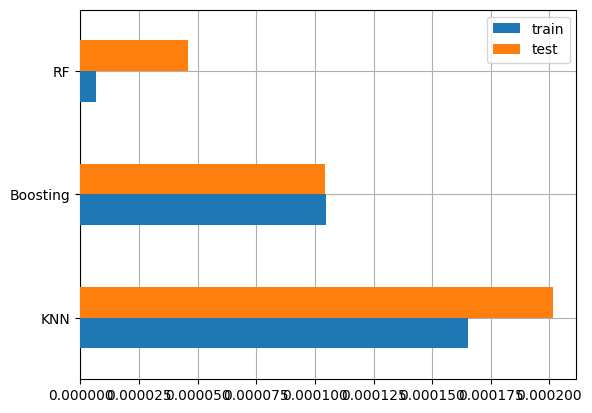

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma KNN memiliki eror yang paling besar. Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1035,3.539199,2.8,3.3,2.8


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati

In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(3)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1035,3.539199,2.785,3.312,2.760
1820,0.840691,1.022,0.701,0.616
33,0.949406,1.080,1.187,1.164
1180,0.897217,1.591,1.090,1.322
1113,3.680961,2.611,3.389,3.235
668,2.614884,1.902,2.613,2.268
1049,1.391788,1.061,1.133,1.029
973,1.735957,1.975,1.867,2.023
2001,1.362044,1.887,1.690,1.813
1773,0.902357,1.269,0.897,0.690


In [ ]:
gpa

,StudentID,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA,dimension
0,1001,19.833723,7,1,2,0,0,1,2.929196,-7.517664
1,1002,15.408756,0,0,1,0,0,0,3.042915,-14.532855
2,1003,4.210570,26,0,2,0,0,0,0.112602,11.530956
3,1004,10.028829,14,0,3,1,0,0,2.054218,-0.551119
4,1005,4.672495,17,1,3,0,0,0,1.288061,2.463186
...,...,...,...,...,...,...,...,...,...,...
2387,3388,10.680555,2,0,4,1,0,0,3.455509,-12.624746
2388,3389,7.583217,4,1,4,0,1,0,3.279150,-10.644167
2389,3390,6.805500,20,0,2,0,0,0,1.142333,5.481353
2390,3391,12.416653,17,0,2,0,1,1,1.803297,2.479674
